Código basado en
 * Sandeep Mistry - Arduino
 * Don Coleman - Chariot Solutions

 
https://github.com/arduino/ArduinoTensorFlowLiteTutorials/

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Intalación de las dependencias necesarias
!apt-get -qq install xxd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
pip install everywhereml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-4-9041fe6a3754>:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-4-9041fe6a3754>:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-4-9041fe6a3754>:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


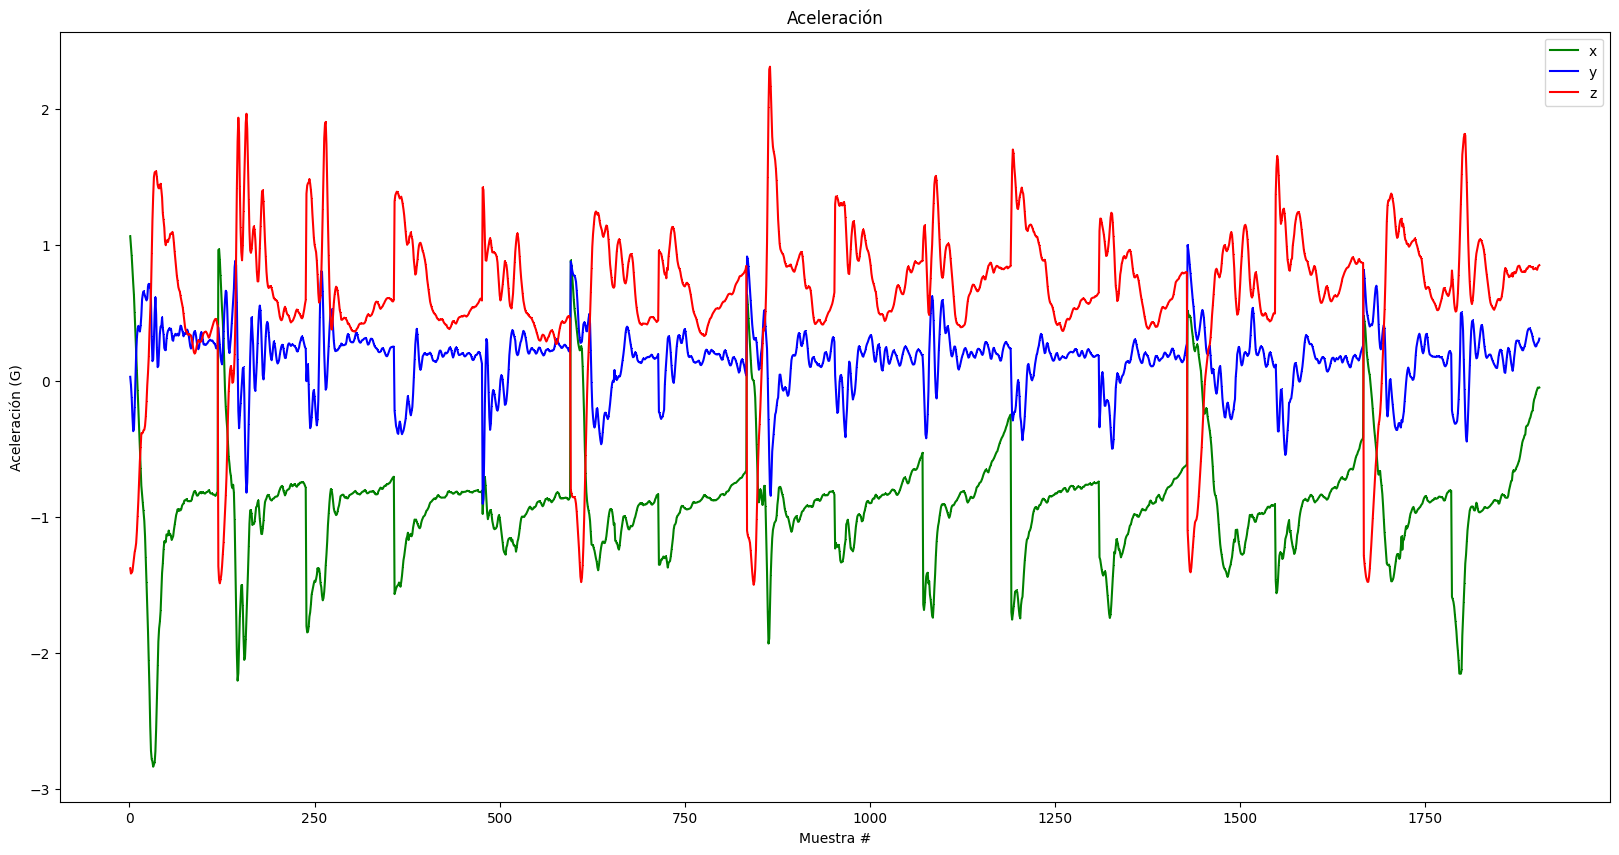

<ipython-input-4-9041fe6a3754>:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-4-9041fe6a3754>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-4-9041fe6a3754>:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


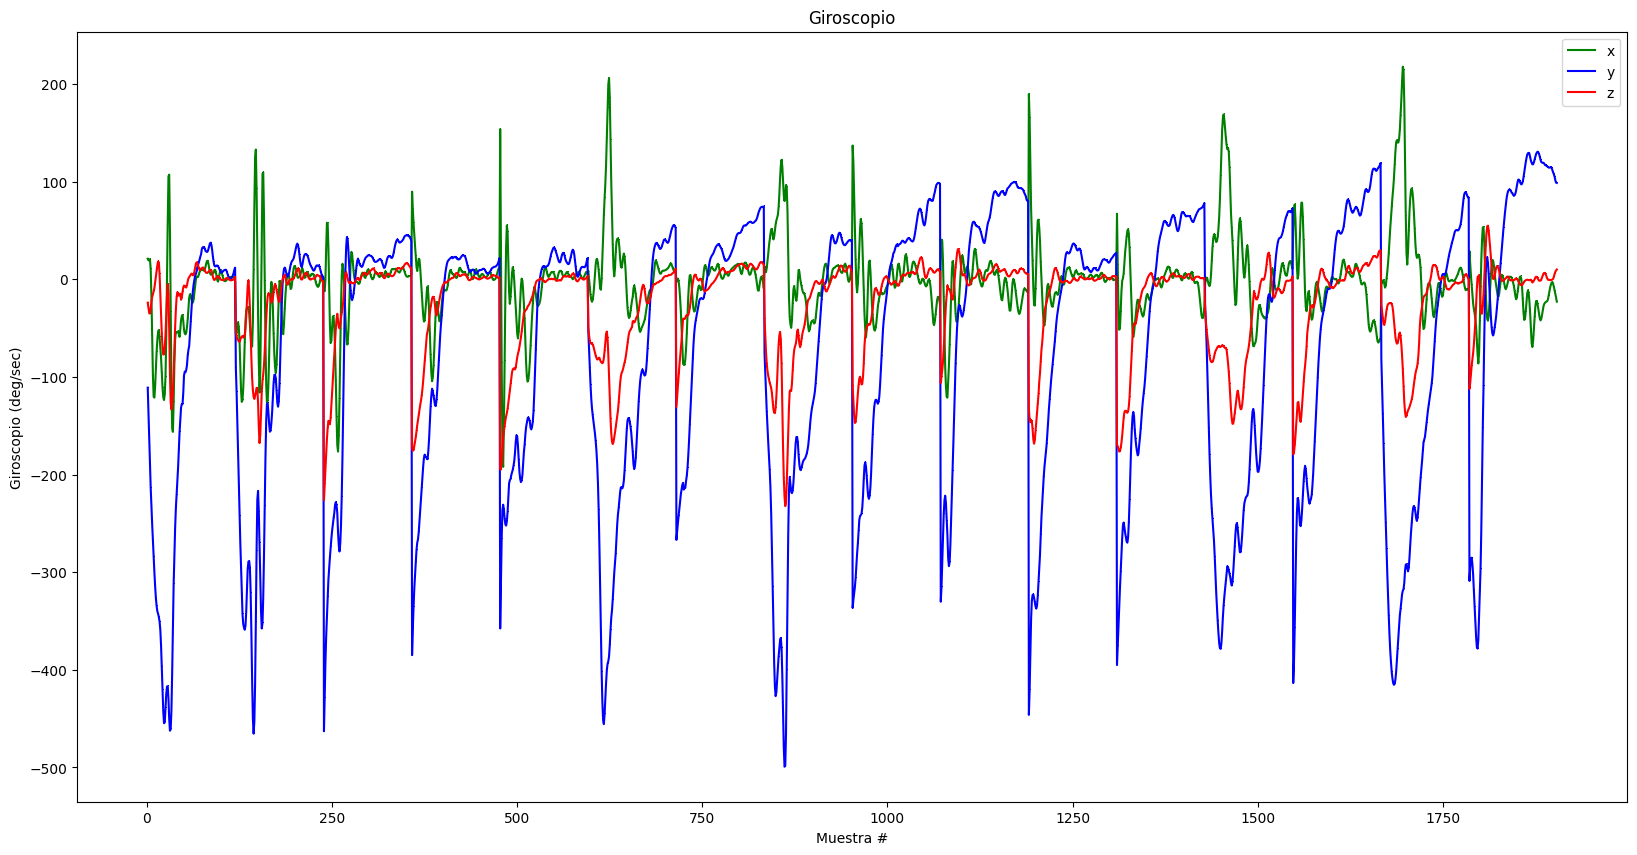

In [4]:

filename = "/content/gdrive/MyDrive/9° Semestre/IA/Colab/Semana 16/Flexion.csv"

df = pd.read_csv(filename)


index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Aceleración")
plt.xlabel("Muestra #")
plt.ylabel("Aceleración (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Giroscopio")
plt.xlabel("Muestra #")
plt.ylabel("Giroscopio (deg/sec)")
plt.legend()
plt.show()


In [5]:

#print(f"TensorFlow version = {tf.__version__}\n")
# Establezca un valor semilla aleatorio fijo, para la reproducibilidad, esto nos permitirá obtener
# los mismos números aleatorios cada vez que se ejecuta el cuaderno
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# la lista de gestos para los que hay datos disponibles
GESTURES = [
    "Arriba",
    "Flexion",
    "Punho",
]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

# crear una matriz codificada one-hot que se utiliza en la salida
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# leer cada archivo csv y enviar una entrada y una salida
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Procesando índice {gesture_index} para gesto '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv("/content/gdrive/MyDrive/9° Semestre/IA/Colab/Semana 16/" + gesture + ".csv")
  
# calcular el número de grabaciones de gestos en el archivo
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tHay {num_recordings} grabaciones del gesto {gesture}.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalizar los datos de entrada, entre 0 y 1:
      # - la aceleración está entre: -4 a +4
      # - el giroscopio está entre: -2000 a +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)

# convertir la lista en una matriz numpy
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Se completó el análisis y la preparación del conjunto de datos.")

Procesando índice 0 para gesto 'Arriba'.
	Hay 17 grabaciones del gesto Arriba.
Procesando índice 1 para gesto 'Flexion'.
	Hay 16 grabaciones del gesto Flexion.
Procesando índice 2 para gesto 'Punho'.
	Hay 17 grabaciones del gesto Punho.
Se completó el análisis y la preparación del conjunto de datos.


In [6]:
# Aleatorice el orden de las entradas, de modo que puedan distribuirse uniformemente para el entrenamiento, la prueba y la validación
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Intercambiar los índices consecutivos (0, 1, 2, etc.) con los índices aleatorios
inputs = inputs[randomize]
outputs = outputs[randomize]

# Divida las grabaciones (grupo de muestras) en tres conjuntos: entrenamiento, prueba y validación
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Se completó la aleatorización y división del conjunto de datos.")

Se completó la aleatorización y división del conjunto de datos.


In [7]:
# Definición y entrenamiento del modelo
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) 
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) 







Epoch 1/600
30/30 [==============================] - 1s 9ms/step - loss: 0.2416 - mae: 0.4404 - val_loss: 0.2821 - val_mae: 0.4856
Epoch 2/600
30/30 [==============================] - 0s 4ms/step - loss: 0.2266 - mae: 0.4266 - val_loss: 0.2422 - val_mae: 0.4545
Epoch 3/600
30/30 [==============================] - 0s 3ms/step - loss: 0.2182 - mae: 0.4280 - val_loss: 0.2175 - val_mae: 0.4302
Epoch 4/600
30/30 [==============================] - 0s 3ms/step - loss: 0.2049 - mae: 0.4075 - val_loss: 0.2542 - val_mae: 0.4581
Epoch 5/600
30/30 [==============================] - 0s 3ms/step - loss: 0.1820 - mae: 0.3644 - val_loss: 0.2269 - val_mae: 0.4336
Epoch 6/600
30/30 [==============================] - 0s 4ms/step - loss: 0.1917 - mae: 0.3920 - val_loss: 0.1896 - val_mae: 0.3977
Epoch 7/600
30/30 [==============================] - 0s 4ms/step - loss: 0.1826 - mae: 0.3841 - val_loss: 0.1684 - val_mae: 0.3812
Epoch 8/600
30/30 [==============================] - 0s 4ms/step - loss: 0.1673 - m

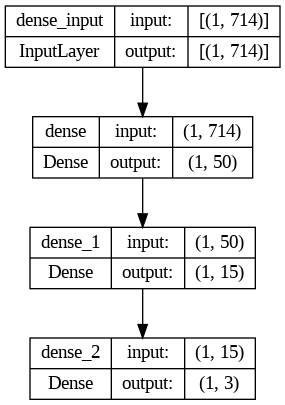

In [8]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))

model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)


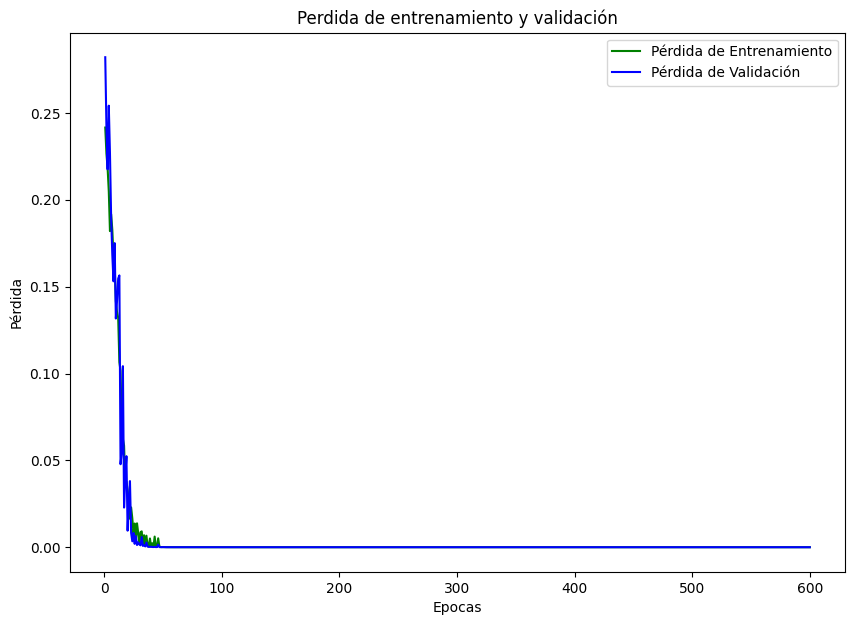

[10.0, 7.0]


In [9]:
# aumentar el tamaño de los gráficos. El tamaño predeterminado es (6,4).
plt.rcParams["figure.figsize"] = (10,7)

# graficar la pérdida, el modelo anterior está configurado para usar "error cuadrático medio" como la función de pérdida
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Perdida de entrenamiento y validación')
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

In [10]:
# usar el modelo para predecir las entradas de prueba
predictions = model.predict(inputs_test)

# imprime las predicciones y los resultados esperados
print("predicciones =\n", np.round(predictions, decimals=3))
print("reales =\n", outputs_test)



1/1 [==============================] - 0s 131ms/step
predicciones =
 [[0.002 0.998 0.   ]
 [0.    0.    1.   ]
 [0.004 0.996 0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.001 0.999 0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.999 0.    0.   ]
 [1.    0.    0.   ]]
reales =
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

[[3 0 0]
 [0 4 0]
 [0 0 3]]


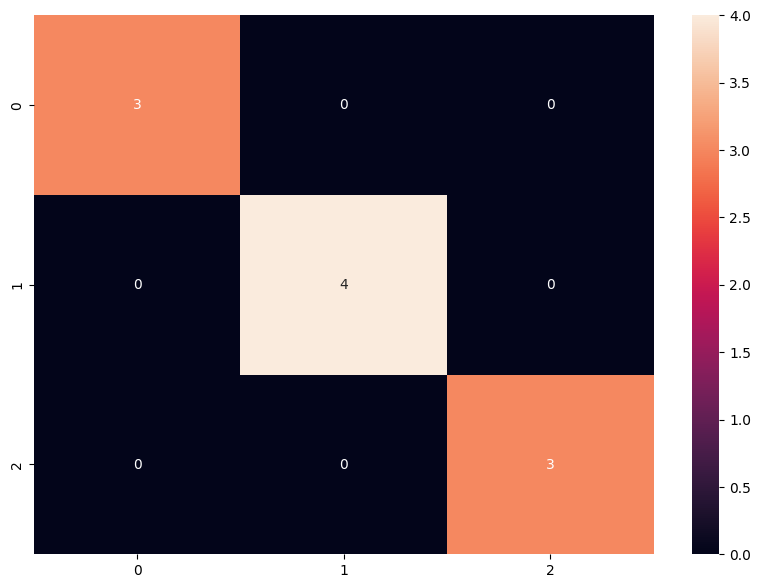

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_test_class = np.argmax(outputs_test,axis=1) 
y_pred_class = np.argmax(predictions,axis=1) 

#Exactitud de los valores predichos
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)

# visualizar la matriz de confusión en un mapa de calor
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

In [12]:
from everywhereml.code_generators.tensorflow import tf_porter

In [14]:
#model.fit(inputs_train, outputs_train
porter = tf_porter(model, inputs_train, outputs_train)
cpp_code = porter.to_cpp(instance_name='MovimientoNN', arena_size=8192)

print(cpp_code)

#ifndef UUID140160355961200
#define UUID140160355961200

#include <EloquentTinyML.h>
#include <eloquent_tinyml/tensorflow.h>

#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

#ifndef ARENA_SIZE
#define ARENA_SIZE 8192
#endif

/** model size = 148344 bytes **/
const unsigned char modelData[] DATA_ALIGN_ATTRIBUTE = { 0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x90, 0x00, 0x00, 0x00, 0xe8, 0x00, 0x00, 0x00, 0x48, 0x3d, 0x02, 0x00, 0x58, 0x3d, 0x02, 0x00, 0x14, 0x43, 0x02, 0x00, 0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00, 0x10, 0x00, 0x0c,